<a href="https://www.kaggle.com/code/sanandachowdhury/digit-recognizer?scriptVersionId=113638446" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
%matplotlib inline



In [2]:
data = pd.read_csv('../input/digit-recognizer/train.csv')
X_test = pd.read_csv('../input/digit-recognizer/test.csv')

In [3]:
data_y = data['label'].values
data_x = data.drop('label',axis=1)

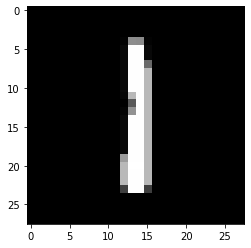

In [4]:
img = data_x.iloc[2].values.reshape((28,28))
plt.imshow(img,cmap='gray')

In [5]:
set(data_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [6]:
X_train, X_val, y_train, y_val = train_test_split(data_x, data_y, test_size = 0.1, random_state=42)

In [7]:
model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(784,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)])

2022-12-12 17:10:39.144929: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [8]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 167,818
Trainable params: 167,818
Non-trainable params: 0
__________________________________________________

In [9]:
model.fit(X_train, y_train, batch_size=256, epochs=10, validation_data=(X_val, y_val))

2022-12-12 17:10:39.846232: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
148/148 [==============================] - 3s 13ms/step - loss: 0.8890 - accuracy: 0.8126 - val_loss: 0.3094 - val_accuracy: 0.9200
Epoch 2/10
148/148 [==============================] - 2s 13ms/step - loss: 0.2129 - accuracy: 0.9463 - val_loss: 0.2022 - val_accuracy: 0.9419
Epoch 3/10
148/148 [==============================] - 2s 16ms/step - loss: 0.1436 - accuracy: 0.9613 - val_loss: 0.1504 - val_accuracy: 0.9550
Epoch 4/10
148/148 [==============================] - 2s 12ms/step - loss: 0.1173 - accuracy: 0.9668 - val_loss: 0.1411 - val_accuracy: 0.9583
Epoch 5/10
148/148 [==============================] - 2s 11ms/step - loss: 0.0963 - accuracy: 0.9721 - val_loss: 0.1402 - val_accuracy: 0.9619
Epoch 6/10
148/148 [==============================] - 2s 10ms/step - loss: 0.0814 - accuracy: 0.9763 - val_loss: 0.1387 - val_accuracy: 0.9605
Epoch 7/10
148/148 [==============================] - 2s 11ms/step - loss: 0.0715 - accuracy: 0.9797 - val_loss: 0.1432 - val_accuracy: 0.9590

The predicted label is: 4


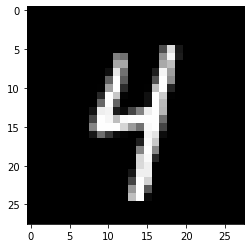

In [10]:
plt.imshow(X_test.iloc[25].values.reshape((28,28)),cmap='gray')
print("The predicted label is:" ,model.predict(X_test).argmax(axis=1)[25])

In [11]:
outsub = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
outsub

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
prediction = model.predict(outsub)
predicted_classes = np.argmax(prediction,axis=1)
submissions=pd.DataFrame({"ImageId": list(range(1,len(predicted_classes)+1)),
                         "Label": predicted_classes})
submissions.to_csv("submission.csv", index=False, header=True)